In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

import os
os.makedirs('plots', exist_ok=True)

In [2]:
stats_file = 'oco2-target-distances.json'
stats_file = 'oco2-target-distances-pub.json' # Custom path for user

with open(stats_file) as fp:
    stats = json.load(fp)
    
for tid in stats:
    for series in stats[tid]:
        stats[tid][series] = np.array(stats[tid][series])
        
print(f'Loaded distances for {len(stats)} target IDs')

Loaded distances for 19 target IDs


In [3]:
def plot_stats(s, what, show=False):
    fig, (ax1, ax2) = plt.subplots(1 ,2, figsize=(8, 8))
    ax1.hist(s['target_mode_km'], bins=np.arange(0, 50, 2.5))
    ax2.hist(s['target_mode_deg'], bins=np.arange(0, 0.5, .025))
    
    ax1.set_title(f'Target-mode distance distribution\nfor {what} [km]')
    ax2.set_title(f'Target-mode distance distribution\nfor {what} [deg]')
    
    for ax, series in zip([ax1, ax2], [s['target_mode_km'], s['target_mode_deg']]):
        if len(series) == 0:
            ax.text(0.5, 0.5, 'No data', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        else:
            min_v = np.min(series)
            max_v = np.max(series)
            mean_v = np.mean(series)
            std_dev_v = np.std(series)
            p90 = np.percentile(series, 90)
            p95 = np.percentile(series, 95)
            p99 = np.percentile(series, 99)

            ax.text(
                0.9, 0.9, 
                f'Min: {min_v:.3}\nMax: {max_v:.3}\nMean: {mean_v:.3}\nStd. Dev.: {std_dev_v:.3}\np90: {p90:.3}\np95: {p95:.3}\np99: {p99:.3}', 
                horizontalalignment='right', verticalalignment='top', 
                transform=ax.transAxes
            )
    
    plt.tight_layout()
    plt.savefig(f'plots/{what}.png')
    
    if show:
        plt.show()
    else:
        print(f'\rSaved plots/{what}.png            ', end='')
        plt.close()

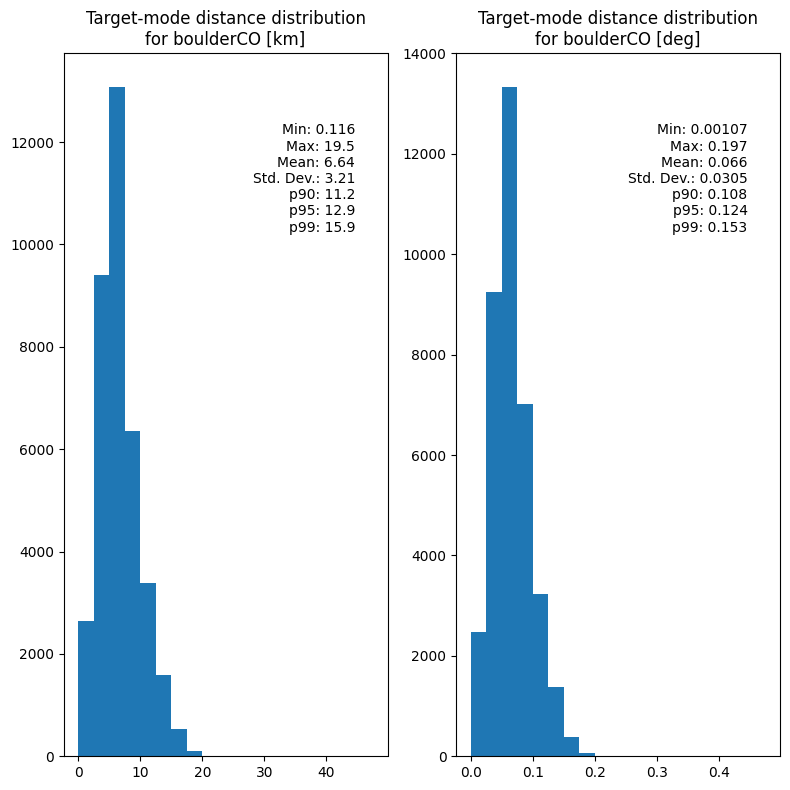

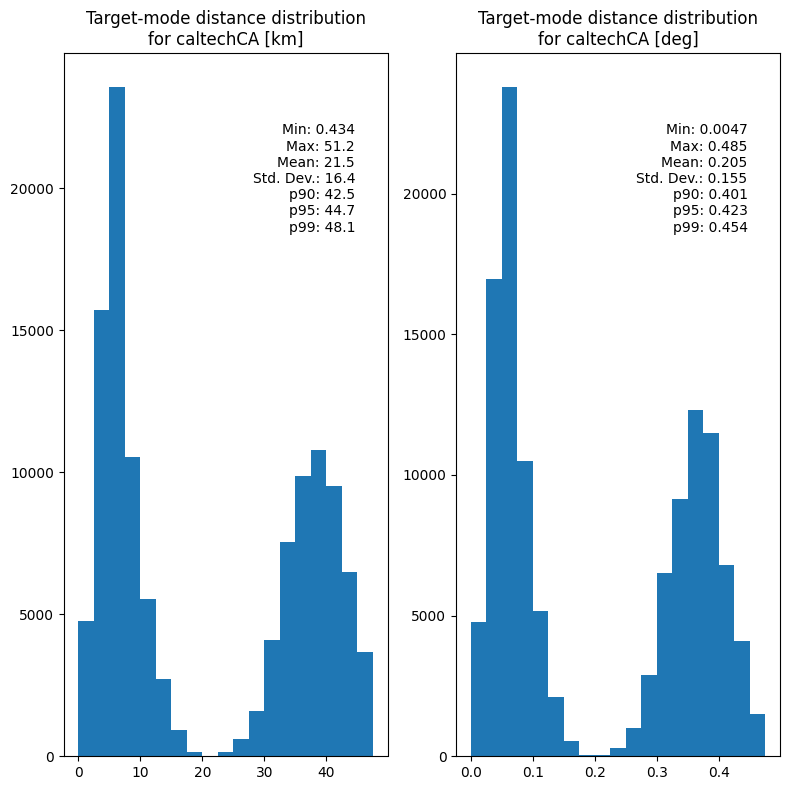

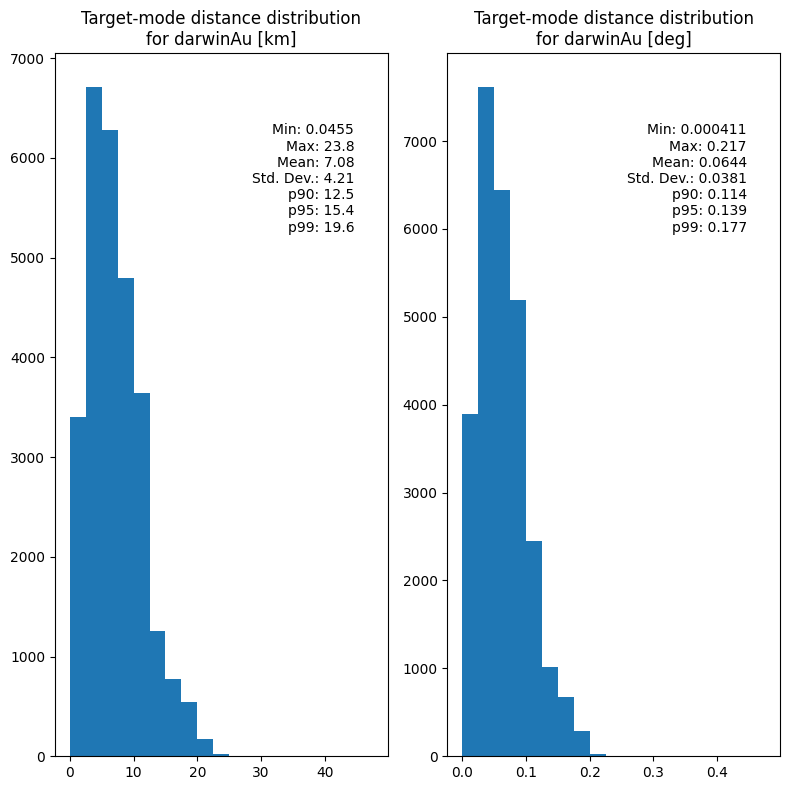

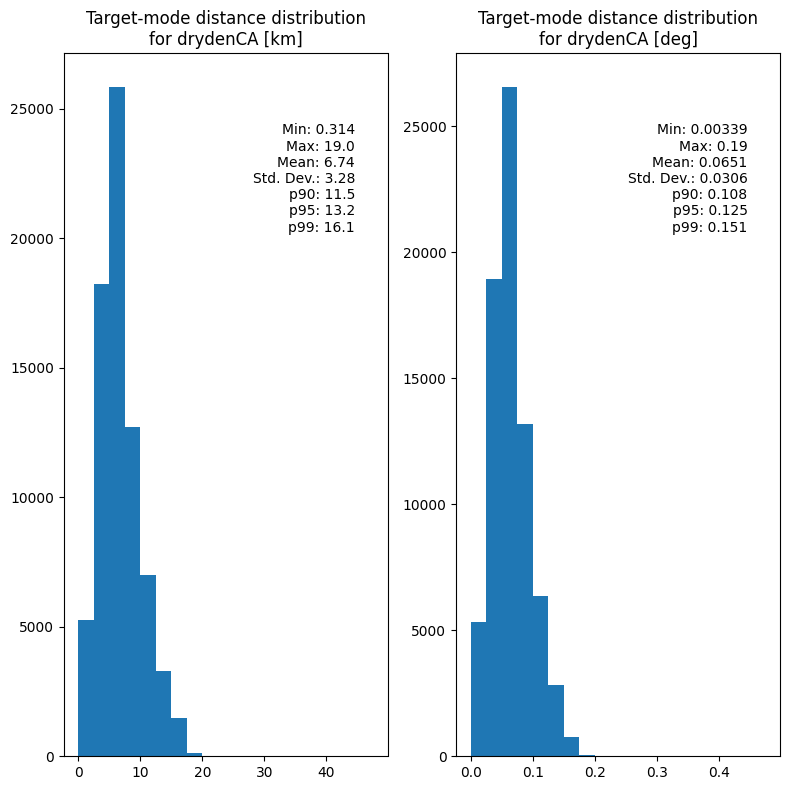

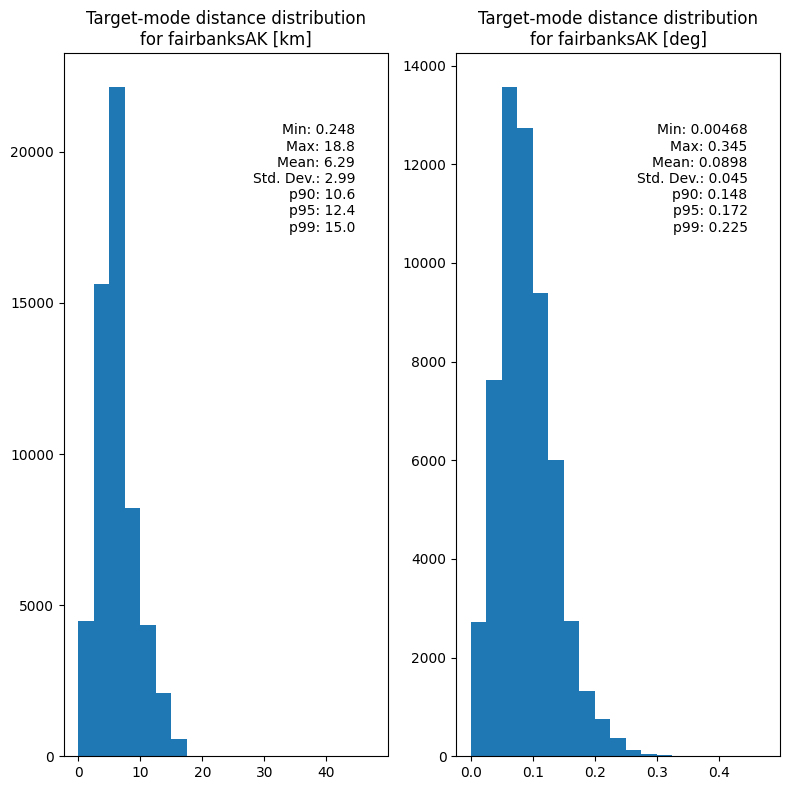

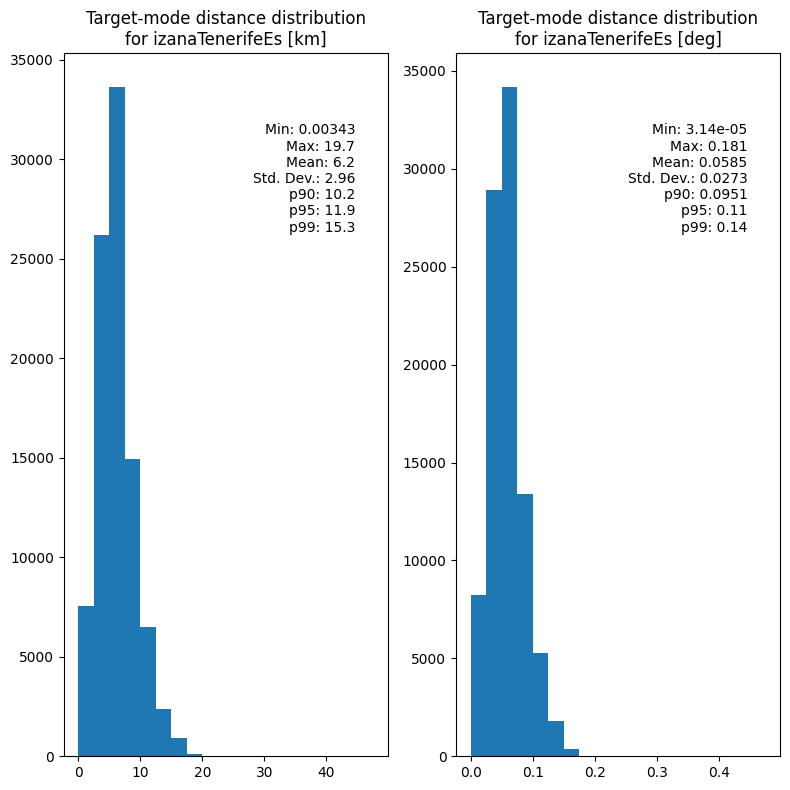

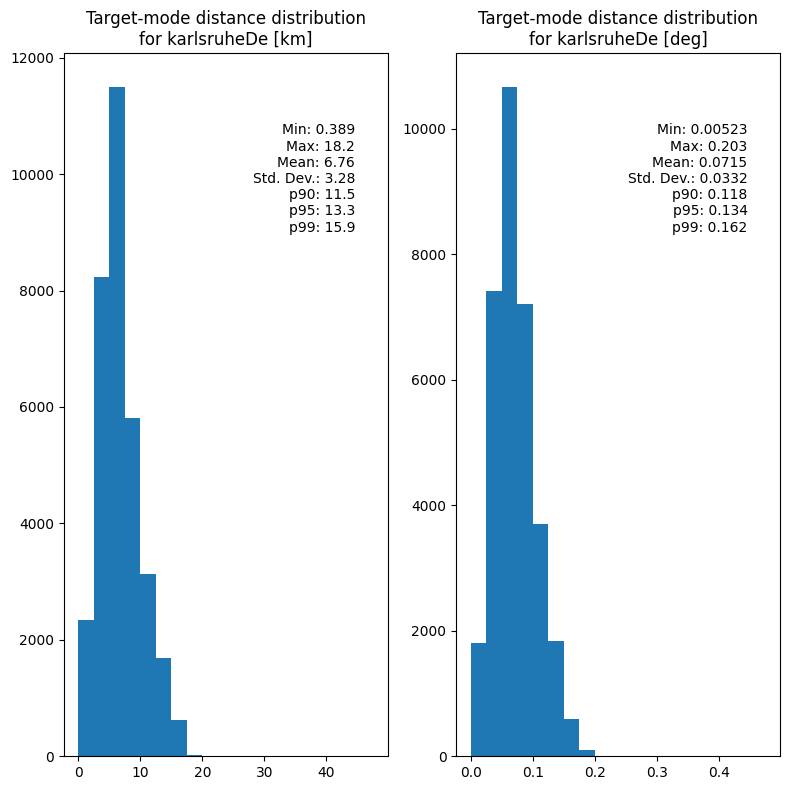

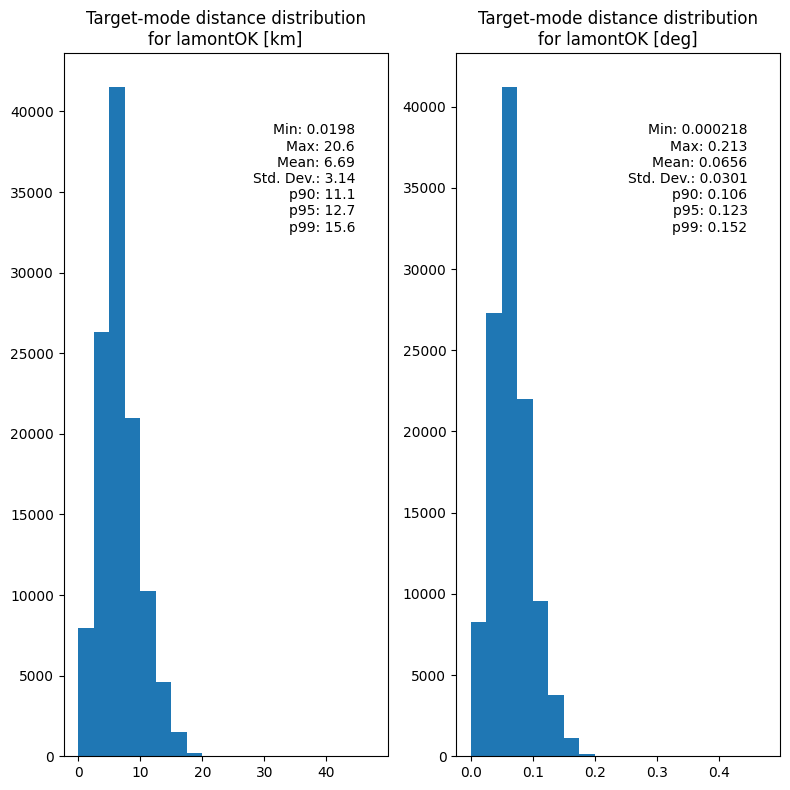

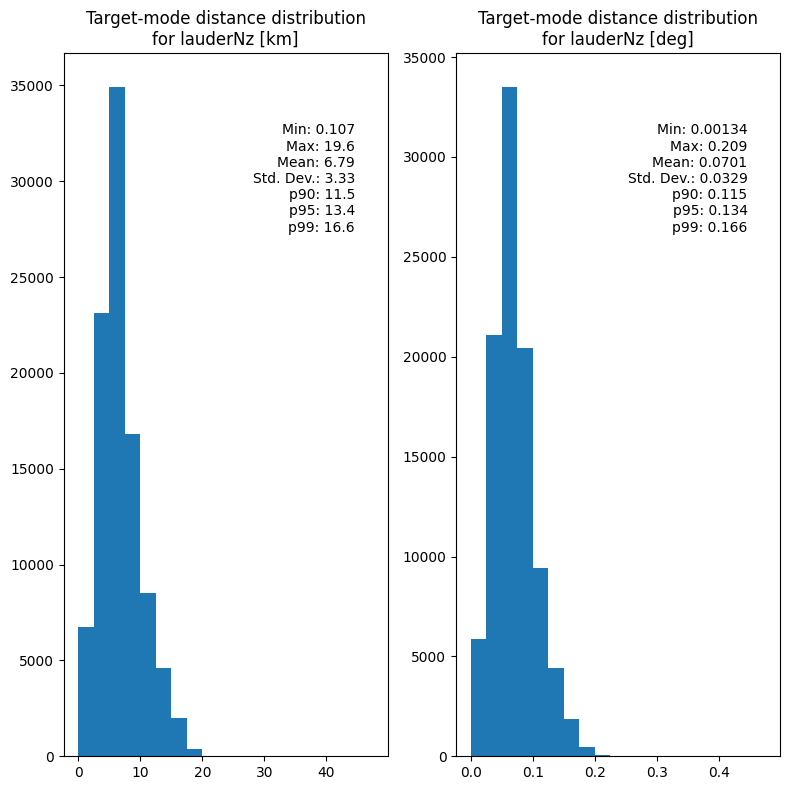

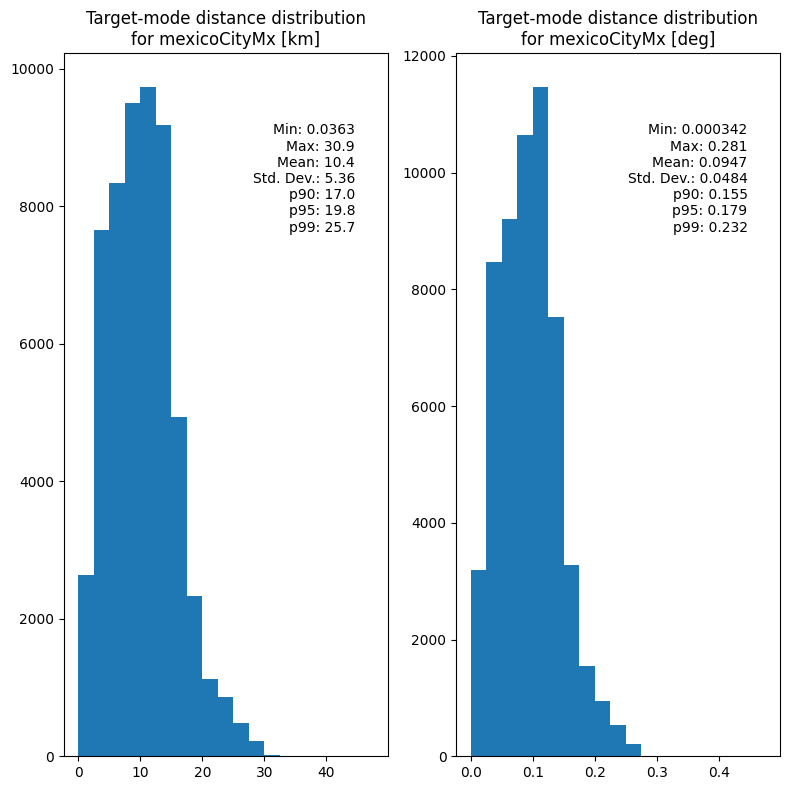

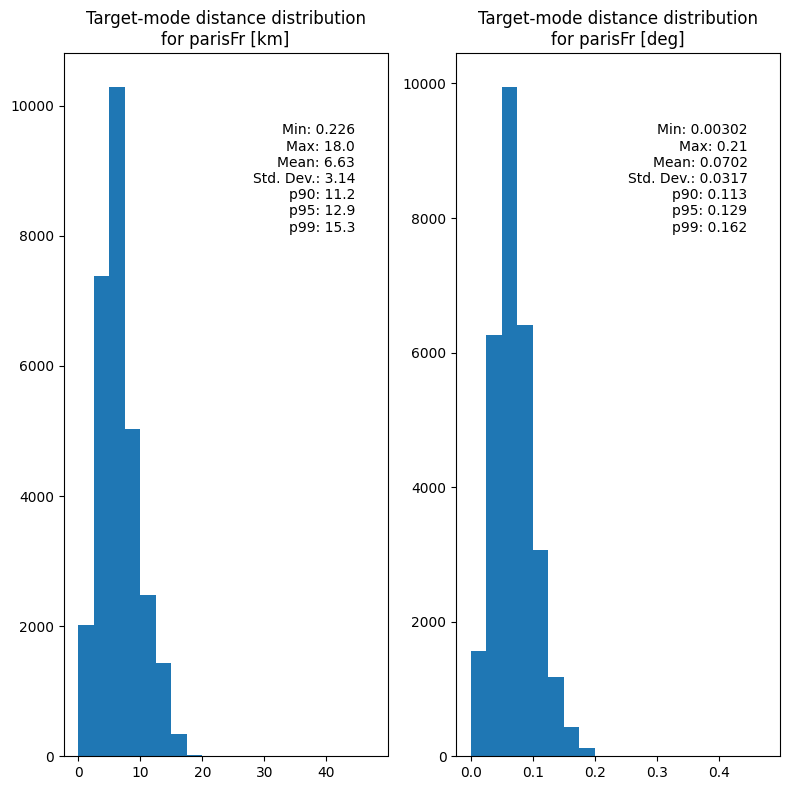

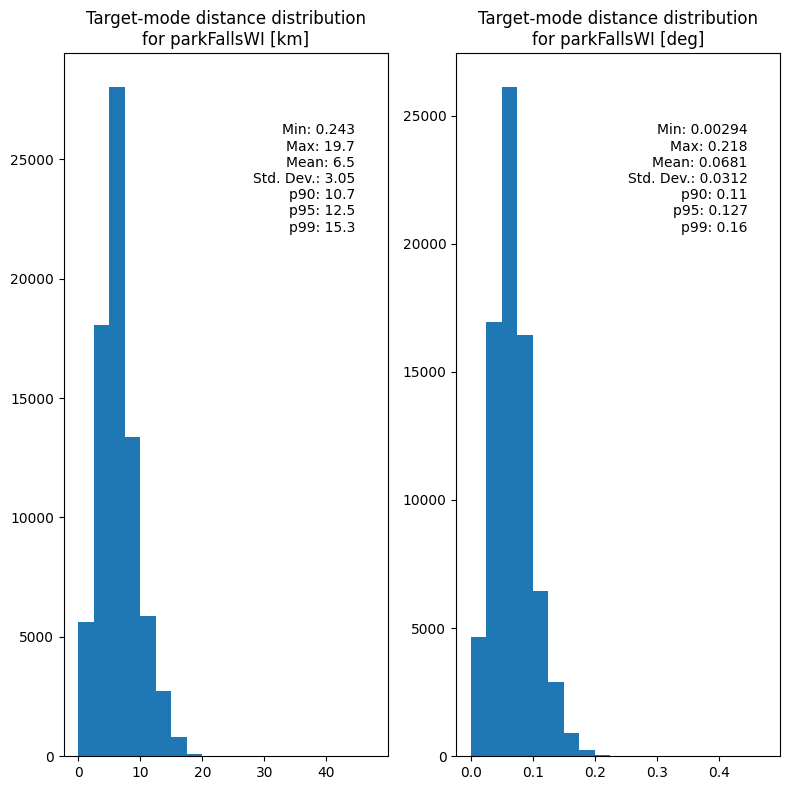

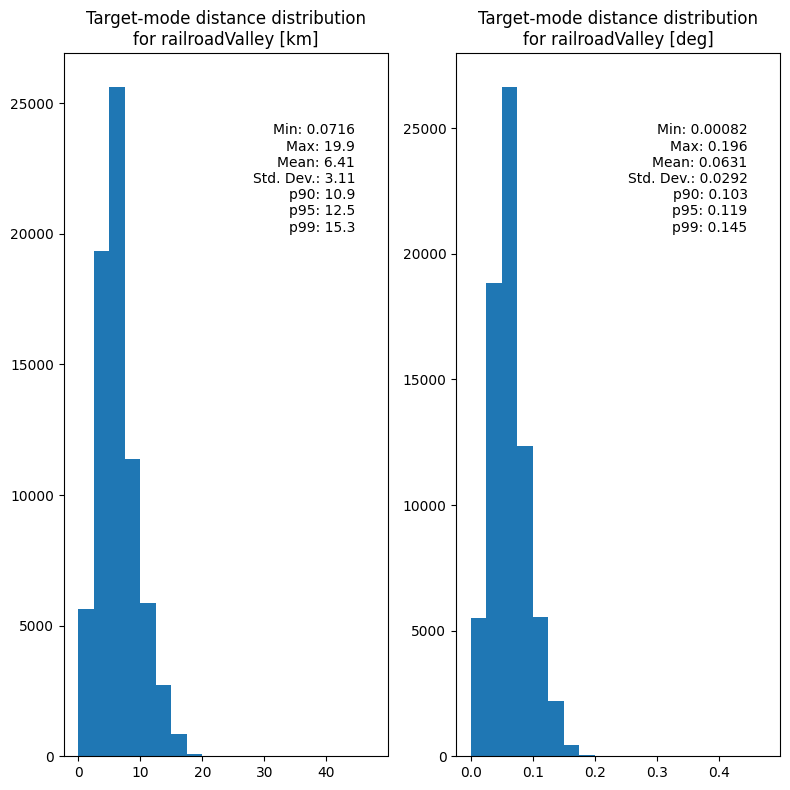

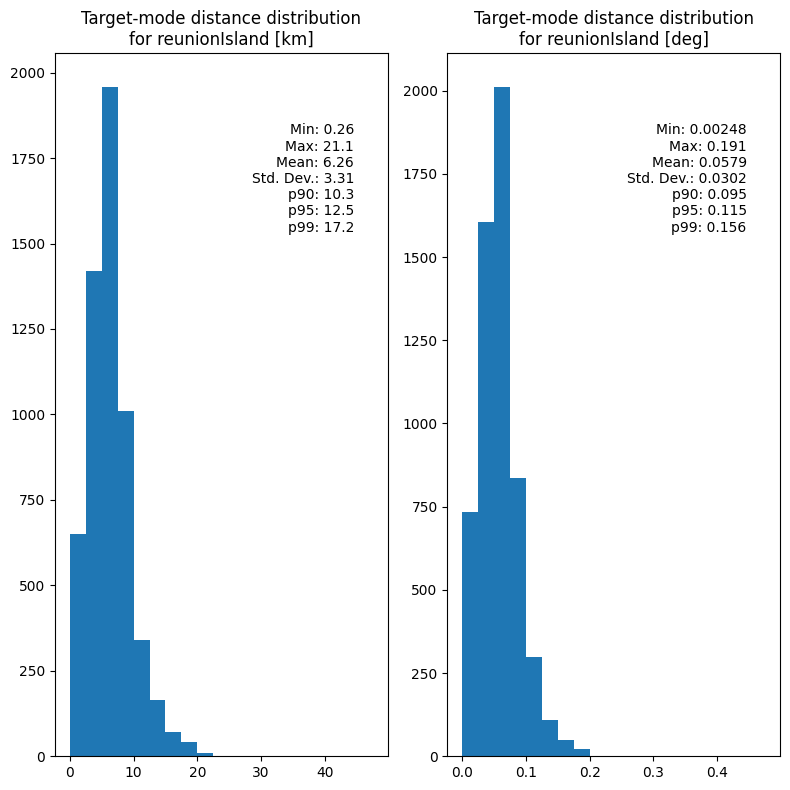

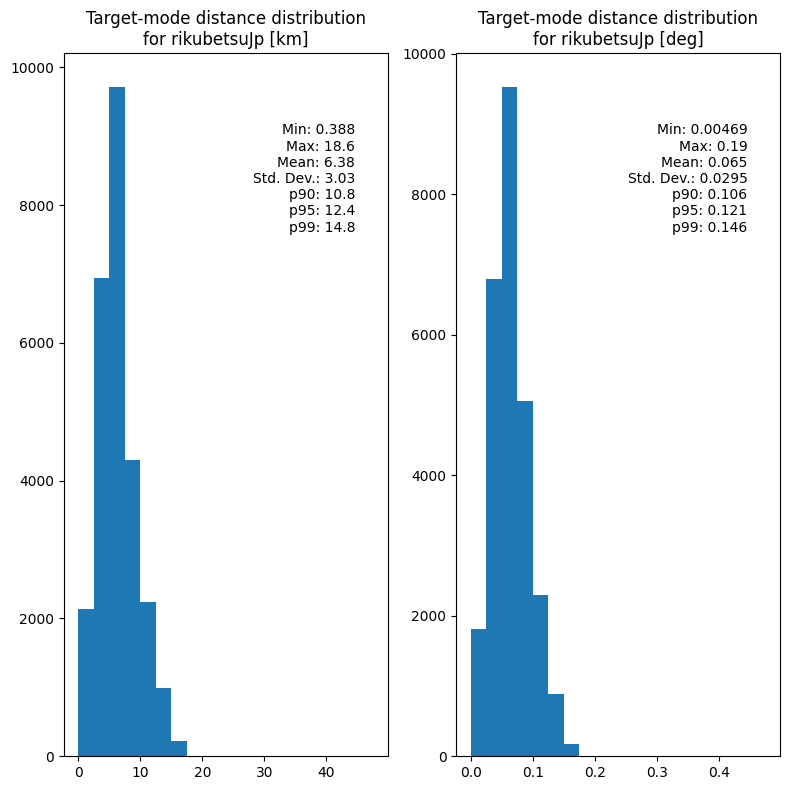

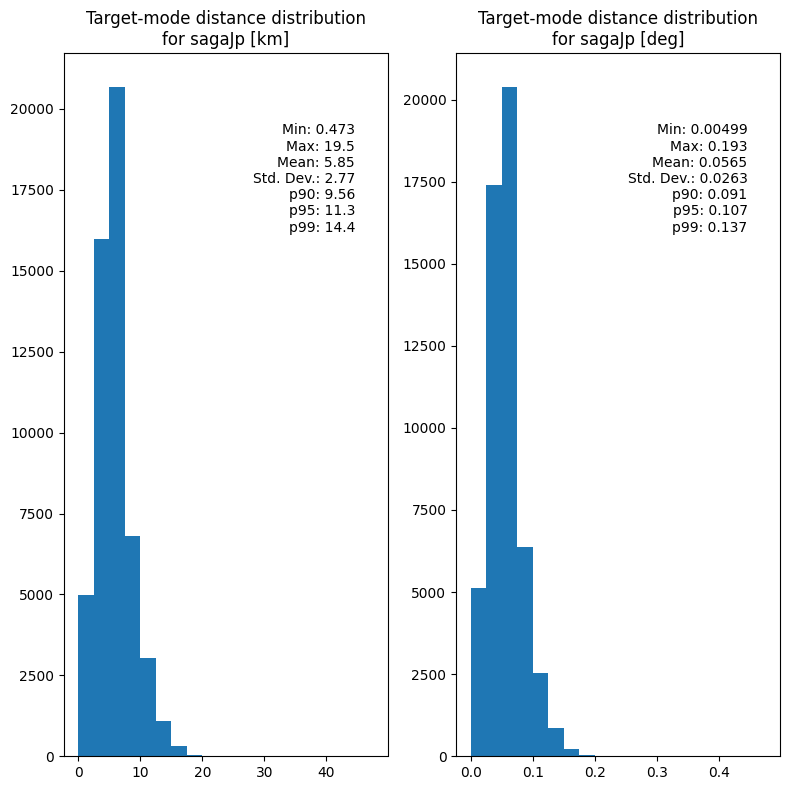

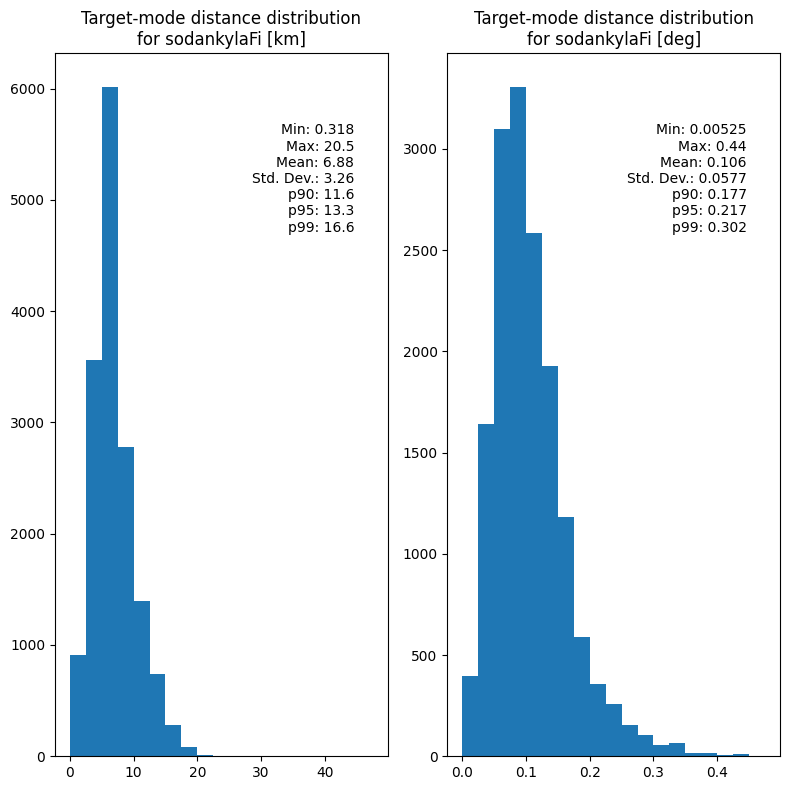

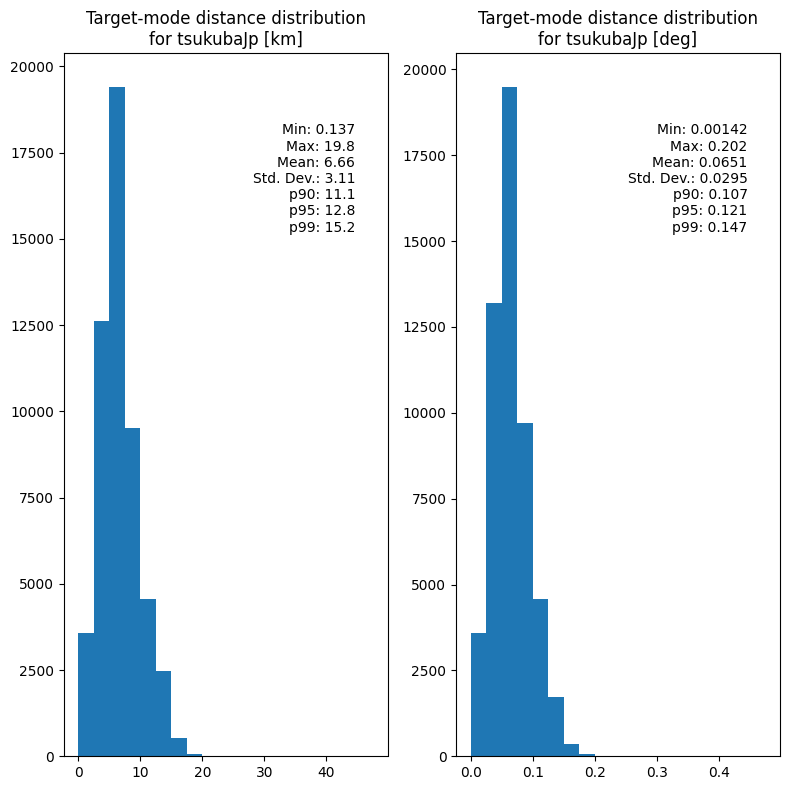

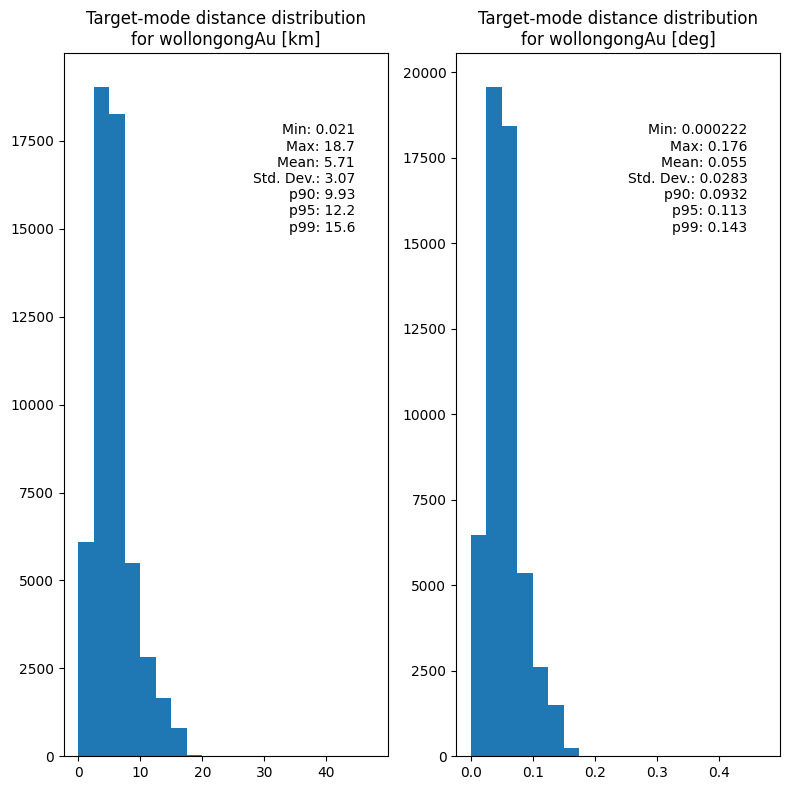

In [4]:
for tid in stats:
    plot_stats(stats[tid], tid, True)

In [5]:
all_stats = dict(
    all=dict(
        target_mode_km=np.hstack([stats[tid]['target_mode_km'] for tid in stats]),
        target_mode_deg=np.hstack([stats[tid]['target_mode_deg'] for tid in stats])
    )
)

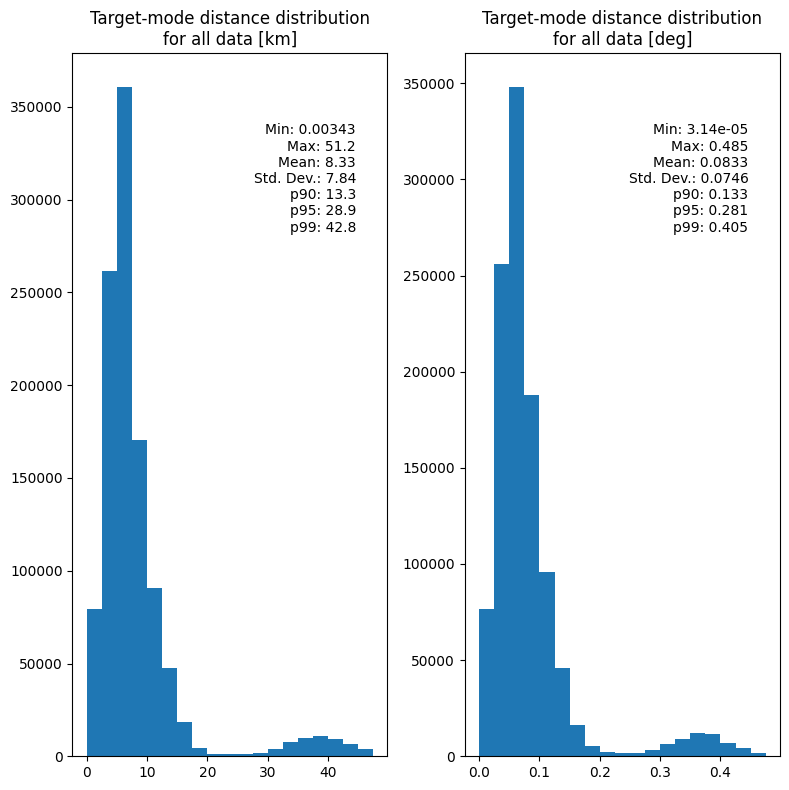

In [6]:
plot_stats(all_stats['all'], 'all data', True)